In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler


from tpot import TPOTClassifier


In [126]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.combine import SMOTETomek
from sklearn.ensemble import VotingClassifier


In [127]:
from sklearn.metrics import classification_report

In [128]:
df=pd.read_excel(r"D:\Master Data Science\Graduation Project\All datasets\df17_replaceOut2.xlsx",sheet_name =0)

In [129]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,CallFailureRatio,CallProblemRatio,ActiveRate,RetentionSuccessRatio,RevenuePerMinute,RevenuePerOverage,AllMinutesPermonth,AverageCallsPerMonth,CustomerCareCallsPerMonth,OutInRatio
0,3000002,Yes,24.00,219,22,0.25,0.0,0.0,-157,-19.00,...,0.008537,0.017073,0.5,0.0,0.109589,24.000000,4.760870,1.782609,0.000000,0.000000
1,3000010,Yes,16.99,10,17,0.00,0.0,0.0,-4,0.00,...,0.050000,0.050000,1.0,0.0,1.699000,16.990000,0.217391,0.130435,0.000000,0.000000
2,3000014,No,38.00,8,38,0.00,0.0,0.0,-2,0.00,...,0.000000,0.000000,1.0,0.0,4.750000,38.000000,0.173913,0.108696,0.000000,0.300000
3,3000022,No,82.28,1312,75,1.24,0.0,0.0,157,8.10,...,0.038176,0.054065,1.0,0.0,0.062713,82.280000,28.521739,10.534783,0.093478,3.288000
4,3000026,Yes,17.14,0,17,0.00,0.0,0.0,0,-0.20,...,0.000000,0.000000,1.0,0.0,17.140000,17.140000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47849,3399906,No,31.92,63,17,0.00,43.0,0.0,-38,-13.20,...,0.022801,0.022801,1.0,0.0,0.506667,0.742326,3.533333,1.023333,0.000000,0.000000
47850,3399922,No,50.00,492,50,0.00,0.0,0.0,0,0.00,...,0.054734,0.059172,1.0,0.0,0.101626,50.000000,16.400000,2.253333,0.010000,6.700000
47851,3399942,No,71.99,724,70,0.00,4.0,0.5,-40,-2.00,...,0.052057,0.055697,1.0,0.0,0.099434,17.997500,24.266667,9.156667,0.000000,85.666667
47852,3399946,Yes,117.49,384,30,0.00,102.5,0.0,0,0.00,...,0.026042,0.032552,1.0,0.0,0.305964,1.146244,16.216667,5.120000,0.000000,1.300000


In [130]:
data =df.copy()

In [131]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'CurrentEquipmentDays', 'TruckOwner', 'RVOwner',
       'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'IncomeCat', 'PrizmCat', 'OccupationCat', 'CreditCat', 'MinutesDiff',
       'Rev_Rec_Diff', 'RevRe

In [132]:
x = data.drop(columns=['CustomerID','Churn', 'Inbound vs Outbound Ratio','IncomeGroup','CreditRating','PrizmCode','Occupation','MinutesDiff',
       'Rev_Rec_Diff', 'RevRecDiff_Flag', 'ratio_bin', 'ratio_bin_custom','CallProblemRatio','AllMinutesPermonth',
       'AverageCallsPerMonth', 'CustomerCareCallsPerMonth','UnansweredCalls'])
x

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCat,OccupationCat,CreditCat,peakCallsfromTotal,CallFailureRatio,ActiveRate,RetentionSuccessRatio,RevenuePerMinute,RevenuePerOverage,OutInRatio
0,24.00,219,22,0.25,0.0,0.0,-157,-19.00,0.7,0.7,...,Urban,Working,High,0.707317,0.008537,0.5,0.0,0.109589,24.000000,0.000000
1,16.99,10,17,0.00,0.0,0.0,-4,0.00,0.3,0.0,...,Urban,Working,Medium,0.833333,0.050000,1.0,0.0,1.699000,16.990000,0.000000
2,38.00,8,38,0.00,0.0,0.0,-2,0.00,0.0,0.0,...,Urban,Working,High,0.260000,0.000000,1.0,0.0,4.750000,38.000000,0.300000
3,82.28,1312,75,1.24,0.0,0.0,157,8.10,18.5,7.7,...,Other,UnKnown,Medium,0.560875,0.038176,1.0,0.0,0.062713,82.280000,3.288000
4,17.14,0,17,0.00,0.0,0.0,0,-0.20,0.0,0.0,...,Other,Working,High,0.000000,0.000000,1.0,0.0,17.140000,17.140000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47849,31.92,63,17,0.00,43.0,0.0,-38,-13.20,0.7,0.0,...,Other,UnKnown,High,0.521173,0.022801,1.0,0.0,0.506667,0.742326,0.000000
47850,50.00,492,50,0.00,0.0,0.0,0,0.00,3.7,0.3,...,Urban,UnKnown,Low,0.714497,0.054734,1.0,0.0,0.101626,50.000000,6.700000
47851,71.99,724,70,0.00,4.0,0.5,-40,-2.00,14.3,1.0,...,Other,Working,High,0.953768,0.052057,1.0,0.0,0.099434,17.997500,85.666667
47852,117.49,384,30,0.00,102.5,0.0,0,0.00,4.0,1.0,...,Other,Working,Low,0.646484,0.026042,1.0,0.0,0.305964,1.146244,1.300000


In [133]:
label_mappingsX = {}

def LabelData(label_mappings,df, cols):

    for col in cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    return label_mappings


In [134]:
cats = ['TruckOwner','RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard','NewCellphoneUser','OwnsMotorcycle',
        'MadeCallToRetentionTeam','IncomeCat', 'PrizmCat', 'OccupationCat', 'CreditCat']

In [135]:
encoding_mapX = LabelData(label_mappingsX,x, cats)


In [136]:
encoding_mapX

{'TruckOwner': {'No': 0, 'Yes': 1},
 'RVOwner': {'No': 0, 'Yes': 1},
 'Homeownership': {'Known': 0, 'Unknown': 1},
 'RespondsToMailOffers': {'No': 0, 'Yes': 1},
 'OptOutMailings': {'No': 0, 'Yes': 1},
 'OwnsComputer': {'No': 0, 'Yes': 1},
 'HasCreditCard': {'No': 0, 'Yes': 1},
 'NewCellphoneUser': {'No': 0, 'Yes': 1},
 'OwnsMotorcycle': {'No': 0, 'Yes': 1},
 'MadeCallToRetentionTeam': {'No': 0, 'Yes': 1},
 'IncomeCat': {'High': 0, 'Low': 1, 'Medium': 2, 'UnKnown': 3},
 'PrizmCat': {'Other': 0, 'Rural': 1, 'Urban': 2},
 'OccupationCat': {'Not Working': 0, 'Student': 1, 'UnKnown': 2, 'Working': 3},
 'CreditCat': {'High': 0, 'Low': 1, 'Medium': 2}}

In [137]:
y = data[['Churn']]

In [138]:
y

,Churn
0,Yes
1,Yes
2,No
3,No
4,Yes
...,...
47849,No
47850,No
47851,No
47852,Yes


In [139]:
catY = ['Churn']
label_mappingsY ={}
encoding_mapY = LabelData(label_mappingsY,y, catY)


C:\Users\nermeen.ashraf\AppData\Local\Temp\ipykernel_10168\3781769203.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [140]:
encoding_mapY

{'Churn': {'No': 0, 'Yes': 1}}

In [141]:
y

,Churn
0,1
1,1
2,0
3,0
4,1
...,...
47849,0
47850,0
47851,0
47852,1


In [142]:
encoding_mapY

{'Churn': {'No': 0, 'Yes': 1}}

# Try LR


In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9,stratify=y)


In [145]:
#weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])


In [146]:
#classifier = XGBClassifier(scale_pos_weight=weight, use_label_encoder=False, eval_metric='logloss')


In [147]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],  # لازم liblinear يدعم l1
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500]
}

In [148]:
#random_search = RandomizedSearchCV(classifier,param_distributions = params, n_iter=50,scoring = 'roc_auc',n_jobs =1,cv=5,verbose =3, random_state = 9)

In [149]:
#random_search.fit(X_train,y_train)

In [150]:
#best_model = random_search.best_estimator_

In [151]:
#y_pred = best_model.predict(X_test)
#print('Best Parameters:', random_search.best_params_)
#print('Accuracy',accuracy_score(y_test,y_pred))
#print('ROC AUC', roc_auc_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))

In [152]:
#cm = confusion_matrix(y_test, y_pred)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot(cmap='Blues')
#plt.savefig(r"D:\Master Data Science\Graduation Project\Models\confusion_matrixoriginalData.png",
 #           dpi=300, bbox_inches='tight')

#plt.show()

# undersampling

In [154]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

print("before under sampling", X_train.shape)
print("after under sampling",X_under.shape)


before under sampling (38283, 48)
after under sampling (21760, 48)


In [155]:
y_under['Churn'].value_counts(normalize=True).mul(100).round(2)


Churn
0    50.0
1    50.0
Name: proportion, dtype: float64

In [156]:
from sklearn.linear_model import LogisticRegression


In [157]:
# def run_exps(X_blnc , y_blnc, X_test, y_test):

#   models = [
#           ('LogReg', LogisticRegression(random_state = 42)), 
#           ('RF', RandomForestClassifier(random_state = 42)),
#           ('KNN', KNeighborsClassifier()),
#           ('GaussianNB', GaussianNB()),
#           ('XGB', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
#           ('AdaBoost',AdaBoostClassifier(random_state = 42)),
#            ('GradiendtBoost',GradientBoostingClassifier(random_state = 42)),
#            ('LightGB',lgb.LGBMClassifier(random_state = 42))
#         ]

#   for name, model in models:

#     clf = model.fit(X_blnc , y_blnc)
#     y_pred = clf.predict(X_test)
#     conf = confusion_matrix(y_test, y_pred)
#     print(name)
#     sns.heatmap(conf, annot=True, linewidth=0.7, linecolor='black', fmt='g', cmap="BuPu")
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.savefig(fr"D:\Master Data Science\Graduation Project\Models\conf_matrix_undersampling8models_{name}.png",
#                     dpi=300, bbox_inches='tight')
#     plt.show() 
    

#     print(classification_report(y_test, y_pred))
   
 

In [158]:
#run_exps(X_under, y_under, X_test, y_test)


# Try with LR

In [160]:
#run_exps(X_train, y_train, X_test, y_test)


### undersampling is better than the original data

In [162]:
#os = SMOTETomek(sampling_strategy=0.5, random_state=9)
#X_over, y_over = os.fit_resample(X_train, y_train)
#print ('the Number of classes before fit{}'.format(y_train.shape))
#print ('the Number of classes after fit{}'.format(y_over.shape))


In [163]:
#run_exps(X_over, y_over, X_test, y_test)


### undersamplng is better than oversampling

# Try to improve accuracy of models with undersampling

In [166]:
X_train.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls',
       'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'CurrentEquipmentDays',
       'TruckOwner', 'RVOwner', 'Homeownership', 'RespondsToMailOffers',
       'OptOutMailings', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'OwnsMotorcycle',
       'MadeCallToRetentionTeam', 'IncomeCat', 'PrizmCat', 'OccupationCat',
       'CreditCat', 'peakCallsfromTotal', 'CallFailureRatio', 'ActiveRate',
       'RetentionSuccessRatio', 'RevenuePerMinute', 'RevenuePerOverage',
       'OutInRatio'],


In [167]:
cats = ['TruckOwner','RVOwner', 'Homeownership', 'RespondsToMailOffers', 'OptOutMailings',
       'OwnsComputer', 'HasCreditCard','NewCellphoneUser','OwnsMotorcycle',
        'MadeCallToRetentionTeam','IncomeCat', 'PrizmCat', 'OccupationCat', 'CreditCat']

In [168]:
numeric_cols = [col for col in X_train.columns if col not in cats]


In [169]:
numeric_cols

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'CurrentEquipmentDays',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'peakCallsfromTotal',
 'CallFailureRatio',
 'ActiveRate',
 'RetentionSuccessRatio',
 'RevenuePerMinute',
 'RevenuePerOverage',
 'OutInRatio']

In [170]:
X_trainS = X_train.copy()
X_testS = X_test.copy()


In [171]:
X_trainS

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCat,OccupationCat,CreditCat,peakCallsfromTotal,CallFailureRatio,ActiveRate,RetentionSuccessRatio,RevenuePerMinute,RevenuePerOverage,OutInRatio
22403,105.36,1540,71,0.00,102.5,0.0,-309,-20.15,14.7,1.70,...,0,2,1,0.598547,0.032372,1.000000,0.0,0.068416,1.027902,77.666667
32479,47.75,971,45,0.25,36.0,0.0,291,14.65,0.3,1.70,...,0,3,0,0.377093,0.002009,1.000000,0.0,0.049176,1.326389,6.906977
14245,108.27,570,48,1.98,66.0,0.0,0,-20.15,4.0,9.55,...,2,3,0,0.461703,0.012255,1.000000,0.0,0.189947,1.640455,3.212000
22693,30.00,115,30,0.00,0.0,0.0,30,0.00,5.3,0.00,...,0,2,0,0.675342,0.072603,0.666667,0.0,0.260870,30.000000,1.245455
14723,32.50,127,25,0.00,19.0,0.1,99,14.65,3.0,0.70,...,0,2,0,0.693166,0.041841,1.000000,0.0,0.255906,1.710526,11.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,96.72,1251,96,0.99,0.0,0.5,-309,-10.10,18.5,1.70,...,2,2,1,0.502571,0.043245,1.000000,0.0,0.077314,96.720000,28.700000
23446,61.13,364,40,1.98,52.0,0.5,79,14.65,8.7,0.30,...,2,2,1,0.404701,0.055273,1.000000,0.0,0.167940,1.175577,3.010753
5908,61.45,950,45,0.00,91.0,0.5,218,2.60,9.3,9.55,...,1,3,0,0.486392,0.029430,1.000000,0.0,0.064684,0.675275,4.328467
37525,51.23,248,40,0.99,48.0,0.5,-248,-9.40,1.7,4.30,...,1,2,0,0.814433,0.017526,1.000000,0.0,0.206573,1.067292,21.300000


In [172]:
X_testS

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCat,OccupationCat,CreditCat,peakCallsfromTotal,CallFailureRatio,ActiveRate,RetentionSuccessRatio,RevenuePerMinute,RevenuePerOverage,OutInRatio
9490,10.25,298,10,0.250,0.0,0.0,142,-0.20,3.7,9.55,...,2,2,0,0.712500,0.042045,1.0,0.0,0.034396,10.250000,2.522222
47046,83.37,306,32,0.500,102.5,0.0,-156,-20.15,3.7,1.30,...,0,2,0,0.706877,0.041714,1.0,0.0,0.272451,0.813366,4.700000
28922,30.98,86,40,0.990,0.0,0.0,4,1.00,1.7,0.30,...,0,2,0,0.619048,0.040476,1.0,0.0,0.360233,30.980000,0.000000
30187,29.99,242,40,0.000,0.0,0.0,34,0.00,5.7,2.00,...,0,2,0,0.402808,0.061555,1.0,0.0,0.123926,29.990000,3.766667
41958,34.99,411,45,0.000,0.0,0.0,-42,0.00,3.0,0.00,...,2,2,0,0.675676,0.081081,1.0,0.0,0.085134,34.990000,3.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46416,40.24,720,50,0.250,0.0,0.0,176,-0.20,4.3,1.70,...,2,2,0,0.371795,0.027564,1.0,0.0,0.055889,40.240000,5.635514
40174,38.18,701,45,0.250,8.0,0.0,-51,-3.20,1.7,7.30,...,2,2,0,0.499300,0.007933,1.0,0.0,0.054465,4.772500,3.657343
820,128.24,1958,105,2.475,0.0,0.0,-114,-2.60,7.3,9.55,...,2,2,0,0.660510,0.017740,1.0,0.0,0.065495,128.240000,6.323077
12987,52.58,149,46,0.500,0.0,0.5,61,9.10,1.7,2.00,...,2,2,0,0.703934,0.035197,1.0,1.0,0.352886,52.580000,2.173913


In [173]:
scale = StandardScaler()
X_trainS[numeric_cols] = scale.fit_transform(X_trainS[numeric_cols])
X_testS[numeric_cols] = scale.transform(X_testS[numeric_cols])



In [174]:
X_trainS

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCat,OccupationCat,CreditCat,peakCallsfromTotal,CallFailureRatio,ActiveRate,RetentionSuccessRatio,RevenuePerMinute,RevenuePerOverage,OutInRatio
22403,1.627779,1.879829,1.139972,-0.706721,2.114420,-0.61471,-1.984157,-1.757136,1.661067,-0.291222,...,0,2,1,0.042676,-0.169662,0.364714,-0.130718,-0.158337,-0.850967,4.956854
32479,-0.257553,0.820474,-0.066918,-0.410164,0.292698,-0.61471,1.981391,1.626342,-0.918310,-0.291222,...,0,3,0,-1.102406,-0.799507,0.364714,-0.130718,-0.163348,-0.838984,-0.043326
14245,1.723011,0.073898,0.072339,1.642012,1.114527,-0.61471,0.058101,-1.757136,-0.255554,2.172988,...,2,3,0,-0.664907,-0.586971,0.364714,-0.130718,-0.126682,-0.826376,-0.304429
22693,-0.838436,-0.773214,-0.763200,-0.706721,-0.693497,-0.61471,0.256378,0.201976,-0.022693,-0.824872,...,0,2,0,0.439769,0.664901,-1.718241,-0.130718,-0.108210,0.312098,-0.443393
14723,-0.756621,-0.750872,-0.995294,-0.706721,-0.173005,-0.12807,0.712416,1.626342,-0.434677,-0.605134,...,0,2,0,0.531930,0.026771,0.364714,-0.130718,-0.109503,-0.823563,0.295369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37513,1.345029,1.341773,2.300443,0.467646,-0.693497,1.81849,-1.984157,-0.780011,2.341736,-0.291222,...,2,2,1,-0.453589,0.055886,0.364714,-0.130718,-0.156019,2.990525,1.496661
23446,0.180318,-0.309629,-0.299012,1.642012,0.731007,1.81849,0.580231,1.626342,0.586326,-0.730699,...,2,2,1,-0.959650,0.305412,0.364714,-0.130718,-0.132415,-0.845038,-0.318650
5908,0.190790,0.781376,-0.066918,-0.706721,1.799385,1.81849,1.498916,0.454764,0.693800,2.172988,...,1,3,0,-0.537246,-0.230678,0.364714,-0.130718,-0.159309,-0.865123,-0.225534
37525,-0.143667,-0.525596,-0.299012,0.467646,0.621430,1.81849,-1.580993,-0.711952,-0.667538,0.524950,...,1,2,0,1.158972,-0.477631,0.364714,-0.130718,-0.122352,-0.849385,0.973746


In [175]:
X_testS

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,PrizmCat,OccupationCat,CreditCat,peakCallsfromTotal,CallFailureRatio,ActiveRate,RetentionSuccessRatio,RevenuePerMinute,RevenuePerOverage,OutInRatio
9490,-1.484770,-0.432507,-1.691577,-0.410164,-0.693497,-0.61471,0.996614,0.182530,-0.309291,2.172988,...,2,2,0,0.631901,0.031012,0.364714,-0.130718,-0.167198,-0.480752,-0.353171
47046,0.908139,-0.417613,-0.670363,-0.113606,2.114420,-0.61471,-0.972942,-1.757136,-0.309291,-0.416787,...,0,2,0,0.602827,0.024129,0.364714,-0.130718,-0.105193,-0.859579,-0.199280
28922,-0.806364,-0.827205,-0.299012,0.467646,-0.693497,-0.61471,0.084538,0.299202,-0.667538,-0.730699,...,0,2,0,0.148682,-0.001541,0.364714,-0.130718,-0.082330,0.351439,-0.531402
30187,-0.838763,-0.536767,-0.299012,-0.706721,-0.693497,-0.61471,0.282815,0.201976,0.048956,-0.197048,...,0,2,0,-0.969442,0.435726,0.364714,-0.130718,-0.143879,0.311696,-0.265234
41958,-0.675134,-0.222126,-0.066918,-0.706721,-0.693497,-0.61471,-0.219488,0.201976,-0.434677,-0.824872,...,2,2,0,0.441492,0.840778,0.364714,-0.130718,-0.153982,0.512418,-0.294831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46416,-0.503324,0.353166,0.165177,-0.410164,-0.693497,-0.61471,1.221328,0.182530,-0.201817,-0.291222,...,2,2,0,-1.129802,-0.269393,0.364714,-0.130718,-0.161599,0.723175,-0.133173
40174,-0.570739,0.317792,-0.066918,-0.410164,-0.474342,-0.61471,-0.278971,-0.109149,-0.667538,1.466686,...,2,2,0,-0.470504,-0.676630,0.364714,-0.130718,-0.161970,-0.700642,-0.272959
820,2.376545,2.658055,2.718213,2.229195,-0.693497,-0.61471,-0.695354,-0.050813,0.335554,2.172988,...,2,2,0,0.363076,-0.473187,0.364714,-0.130718,-0.159097,4.255873,-0.084587
12987,-0.099487,-0.709913,-0.020499,-0.113606,-0.693497,1.81849,0.461265,1.086736,-0.667538,-0.197048,...,2,2,0,0.587607,-0.111060,0.364714,7.815747,-0.084243,1.218556,-0.377784


# UnderSampling With Scaling

In [177]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_underS, y_underS = undersample.fit_resample(X_trainS, y_train)

print("before under sampling", X_trainS.shape)
print("after under sampling",X_underS.shape)

before under sampling (38283, 48)
after under sampling (21760, 48)


In [178]:
#run_exps(X_underS, y_underS, X_test, y_test)


# hyperparameter tunning

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'class_weight': None, 'C': 0.1}


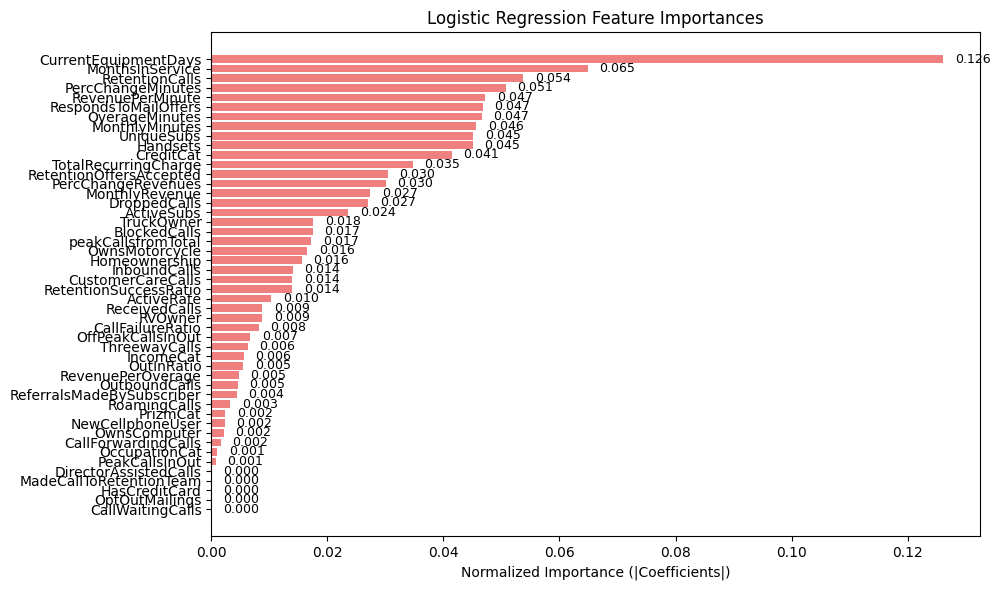

Selected features shape (train): (21760, 44)
Selected features shape (test): (9571, 44)


C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\nermeen.ashraf\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [181]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

random_search = RandomizedSearchCV(
    estimator=lr,
    param_distributions=params,
    n_iter=20,
    scoring='accuracy', 
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_underS, y_underS)

best_lr = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

coefficients = np.abs(best_lr.coef_[0])
feature_names = X_underS.columns if isinstance(X_underS, pd.DataFrame) else [f"Feature {i}" for i in range(X_underS.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
}).sort_values(by='Importance', ascending=False)

# Normalize
importance_df['Normalized Importance'] = importance_df['Importance'] / importance_df['Importance'].sum()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Normalized Importance'], color='lightcoral')
plt.xlabel("Normalized Importance (|Coefficients|)")
plt.title("Logistic Regression Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center', fontsize=9)

# Save the figure
plt.savefig("D:\Master Data Science\Graduation Project\Feature importanceLR", dpi=300, bbox_inches='tight')



plt.show()

# 7. Feature Selection باستخدام SelectFromModel
selector = SelectFromModel(best_lr, prefit=True)
X_underS_selected = selector.transform(X_underS)
x_testS_selected = selector.transform(X_testS)

print("Selected features shape (train):", X_underS_selected.shape)
print("Selected features shape (test):", x_testS_selected.shape)


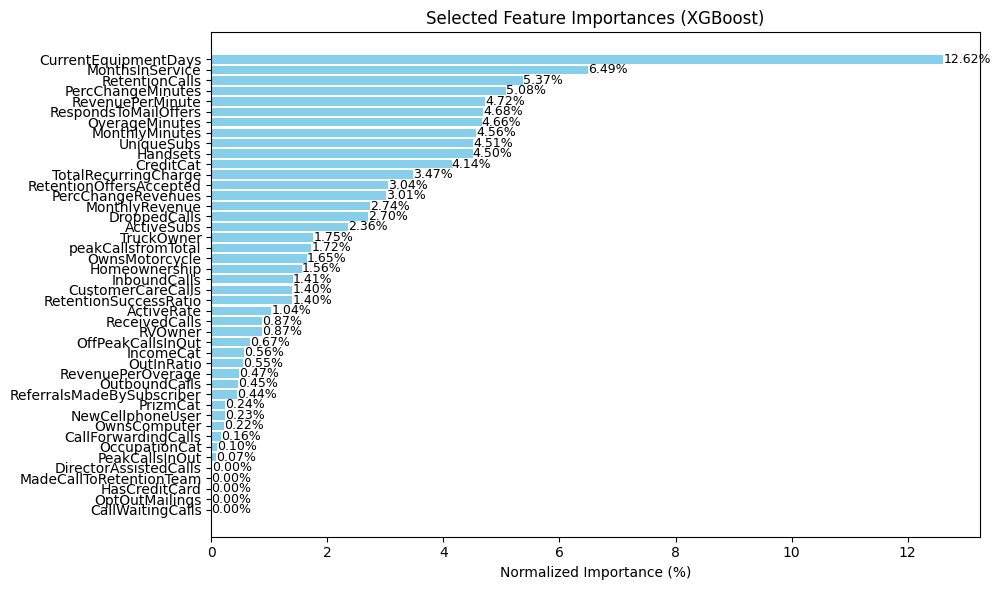

In [183]:
selected_features = importance_df['Feature'][selector.get_support()].tolist()

# Filter importance_df to selected features
selected_importance_df = importance_df[importance_df['Feature'].isin(selected_features)]
plt.figure(figsize=(10, 6))
bars = plt.barh(selected_importance_df['Feature'], selected_importance_df['Normalized Importance'] * 100, color='skyblue')
plt.xlabel("Normalized Importance (%)")
plt.title("Selected Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.tight_layout()

# Add value labels (closer)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}%', va='center', fontsize=9)

# Save the figure
plt.savefig("D:/Master Data Science/Graduation Project/Selected Feature ImportanceLR.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
lr_selected = LogisticRegression(**best_lr.get_params())  # إعادة استخدام أفضل باراميترز
lr_selected.fit(X_underS_selected, y_underS)

y_pred = lr_selected.predict(x_testS_selected)

In [ ]:
from sklearn.metrics import (
    classification_report, accuracy_score, balanced_accuracy_score,
    fbeta_score, confusion_matrix
)

# 1. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(" Accuracy:", round(accuracy, 4))

# 3. Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(" Balanced Accuracy:", round(balanced_acc, 4))

# 4. F2 Score (تركز على الـ Recall أكثر من Precision)
f2 = fbeta_score(y_test, y_pred, beta=2)
print("F2 Score:", round(f2, 4))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


In [ ]:
labels = ['Not Churn', 'Churn']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

y_proba = lr_selected.predict_proba(x_testS_selected)[:, 1]

# 1. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig(r"D:\Master Data Science\Graduation Project\metrics\LRRoccurve.png")

plt.show()

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='teal', lw=2, label='Avg Precision = %0.2f' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc="upper right")
plt.grid()
plt.tight_layout()
plt.savefig(r"D:\Master Data Science\Graduation Project\metrics\LRPercesionRecallCurve.png")

plt.show()

# Undersampling only

In [ ]:
random_search.fit(X_under, y_under)

best_lr2 = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

coefficients2 = np.abs(best_lr.coef_[0])
feature_names2 = X_under.columns if isinstance(X_under, pd.DataFrame) else [f"Feature {i}" for i in range(X_under.shape[1])]

importance_df2 = pd.DataFrame({
    'Feature2': feature_names2,
    'Importance2': coefficients2
}).sort_values(by='Importance2', ascending=False)

# Normalize
importance_df2['Normalized Importance2'] = importance_df2['Importance2'] / importance_df2['Importance2'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df2['Feature2'], importance_df2['Normalized Importance2'], color='lightcoral')
plt.xlabel("Normalized Importance (|Coefficients|)")
plt.title("Logistic Regression Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 7. Feature Selection باستخدام SelectFromModel
selector = SelectFromModel(best_lr, prefit=True)
X_under_selected = selector.transform(X_under)
x_test_selected = selector.transform(X_test)

print("Selected features shape (train):", X_under_selected.shape)
print("Selected features shape (test):", x_test_selected.shape)


In [ ]:
lr_selected2 = LogisticRegression(**best_lr2.get_params())  # إعادة استخدام أفضل باراميترز
lr_selected2.fit(X_under_selected, y_under)

y_pred2 = lr_selected2.predict(x_test_selected)

In [ ]:

# 1. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred2))

# 2. Accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(" Accuracy:", round(accuracy, 4))

# 3. Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred2)
print(" Balanced Accuracy:", round(balanced_acc, 4))

# 4. F2 Score (تركز على الـ Recall أكثر من Precision)
f2 = fbeta_score(y_test, y_pred2, beta=2)
print("F2 Score:", round(f2, 4))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", cm)


In [ ]:
labels = ['Not Churn', 'Churn']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

y_proba2 = lr_selected2.predict_proba(x_test_selected)[:, 1]

# 1. ROC Curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_proba2)
roc_auc2 = roc_auc_score(y_test, y_proba2)

plt.figure(figsize=(8, 5))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
precision2, recall2, _ = precision_recall_curve(y_test, y_proba)
avg_precision2 = average_precision_score(y_test, y_proba2)

plt.figure(figsize=(8, 5))
plt.plot(recall2, precision2, color='teal', lw=2, label='Avg Precision = %0.2f' % avg_precision2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc="upper right")
plt.grid()
plt.tight_layout()
plt.show()